In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

Using numpy's Polynomial class as it likely is built how I would build it, but it is vectorized and makes computations more efficient.

I tested my lagrange finding function vs scipy's lagrange function. Performance is on par and we compute the same results. Proud of this one.

Compute and plot the polynomials of degree $\leq n-1$ that interpolate the function

$$f(x)=(1 + (5x)^2)^{-1}$$

for $x \in [-1, 1]$

In [2]:
def f(x):
    return (1 + (5 * x) ** 2) ** (-1)

In [3]:
def lagrange_approximate(points, f):
    y = f(points)
    return lagrange(points, y)

def my_lagrange(points, f):
    y = f(points)
    coefficients = Polynomial([0.0])
    for yi, j in enumerate(points):
        numerator = Polynomial([1.0])
        denominator = 1
        for m in points:
            if j == m:
                continue
            numerator *= Polynomial([-m, 1.0])
            denominator *= j - m
        coefficients += y[yi] * (numerator / denominator)
    return coefficients

## Question 1.

On the $n$ equally spaced points

$$x_j = -1 + \frac{2j}{n-1}$$

for $j=0,\dots,n-1$

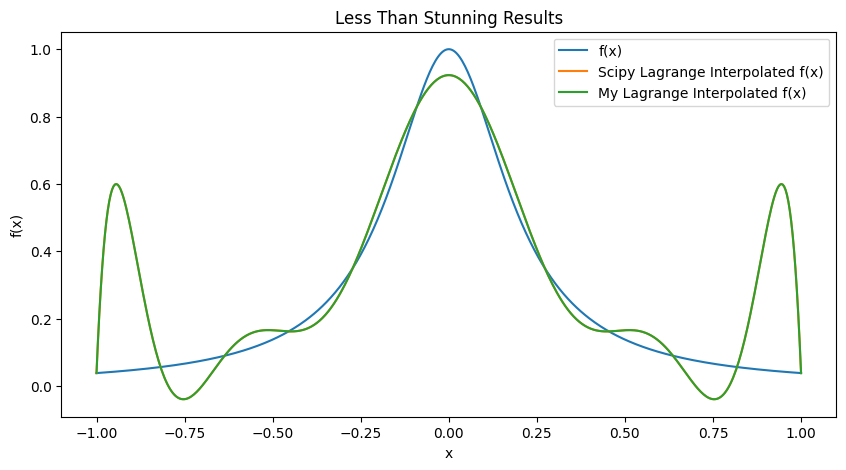

In [4]:
n = 12 
dense_points = np.linspace(-1, 1, 500)
interpolation_points = np.array([-1 + (2 * j) / (n - 1) for j in range(n)])

y = f(dense_points)

my_interpolated_y = Polynomial(
    my_lagrange(interpolation_points, f).coef
)(dense_points)

scipy_interpolated_y = Polynomial(
    lagrange_approximate(interpolation_points, f).coef[::-1]
)(dense_points)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dense_points, y, label="f(x)")
ax.plot(dense_points, scipy_interpolated_y, label="Scipy Lagrange Interpolated f(x)")
ax.plot(dense_points, my_interpolated_y, label="My Lagrange Interpolated f(x)")
ax.set_title("Less Than Stunning Results")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
fig.show()

## Question 2.

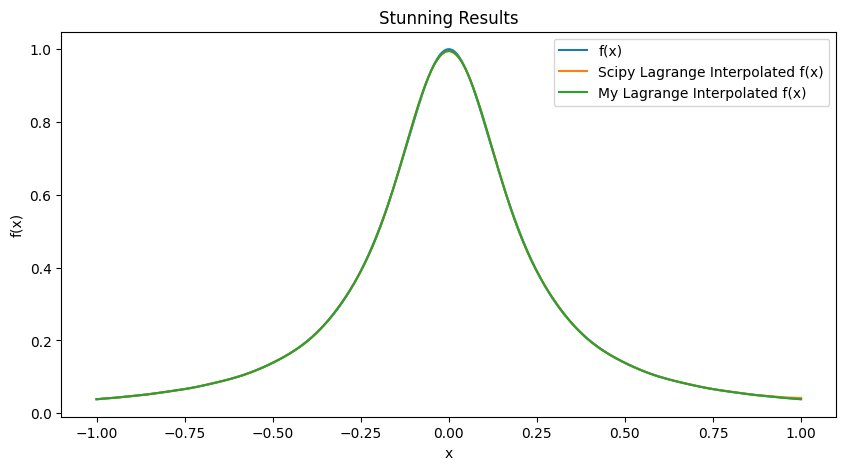

In [5]:
n = 30
dense_points = np.linspace(-1, 1, 500)
interpolation_points = np.array([np.cos((np.pi / 2 + j * np.pi) / n) for j in range(n)])

y = f(dense_points)

my_interpolated_y = Polynomial(
    my_lagrange(interpolation_points, f).coef
)(dense_points)

scipy_interpolated_y = Polynomial(
    lagrange_approximate(interpolation_points, f).coef[::-1]
)(dense_points)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dense_points, y, label="f(x)")
ax.plot(dense_points, scipy_interpolated_y, label="Scipy Lagrange Interpolated f(x)")
ax.plot(dense_points, my_interpolated_y, label="My Lagrange Interpolated f(x)")
ax.legend()
ax.set_title("Stunning Results")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
fig.show()

## Question 3.

In [6]:
def horners(polynomial, value, current=0):
    if current == polynomial.degree():
        return polynomial.coef[current]
    return polynomial.coef[current] + horners(polynomial, value, current + 1) * value

In [7]:
def dp_chebyshev(degree):
    table = [Polynomial([1.0]), Polynomial([0.0, 1.0])]
    for i in range(1, degree+1):
        next_t = Polynomial([0.0, 2.0]) * table[i] - table[i - 1]
        table.append(next_t)
    return table[degree]

In [8]:
chebyshev = dp_chebyshev(4)
roots = chebyshev.roots()
print(f"Roots: {roots}")
print(f"Evaluation at Roots: {chebyshev(roots)}") # numpy uses horners under the hood to evaluate.

Roots: [-0.92387953 -0.38268343  0.38268343  0.92387953]
Evaluation at Roots: [ 5.55111512e-15 -1.33226763e-15  4.44089210e-16  9.21485110e-15]


In [9]:
horners(chebyshev, roots) == chebyshev(roots) # looks like my implementation is the same as numpys

array([ True,  True,  True,  True])